# PJBL Big Data
# Khoirunisa Fitri Handayani
# 2330506054

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Menampilkan Informasi Mengenai Dataset

In [ ]:
file_path = "/content/insurance.csv"
df = pd.read_csv(file_path)

print("Jumlah Baris dan Kolom:", df.shape)

print("\nNama-Nama Kolom:", df.columns)

print("\nLima Baris Pertama Dataset")
print(df.head())

Jumlah Baris dan Kolom: (1000000, 12)

Nama-Nama Kolom: Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level', 'charges'],
      dtype='object')

Lima Baris Pertama Dataset
   age  gender    bmi  children smoker     region medical_history  \
0   46    male  21.45         5    yes  southeast        Diabetes   
1   25  female  25.38         2    yes  northwest        Diabetes   
2   38    male  44.88         2    yes  southwest             NaN   
3   25    male  19.89         0     no  northwest             NaN   
4   49    male  38.21         3    yes  northwest        Diabetes   

  family_medical_history exercise_frequency    occupation coverage_level  \
0                    NaN              Never   Blue collar        Premium   
1    High blood pressure       Occasionally  White collar        Premium   
2    High blood pressure       Occasionally   Blue collar      

## Missing Values Pada Dataset

In [ ]:
missing_values = df.isnull().sum()
print("Detail Jumlah Missing Values di Setiap Kolom")
print(missing_values)

missing_columns = missing_values[missing_values > 0]

print("\nDaftar Kolom yang Memiliki Missing Values")
print(missing_columns)

Detail Jumlah Missing Values di Setiap Kolom
age                            0
gender                         0
bmi                            0
children                       0
smoker                         0
region                         0
medical_history           250762
family_medical_history    250404
exercise_frequency             0
occupation                     0
coverage_level                 0
charges                        0
dtype: int64

Daftar Kolom yang Memiliki Missing Values
medical_history           250762
family_medical_history    250404
dtype: int64


# Data Preparation (Handling Missing Values and Normalization)

In [ ]:
df = df.dropna()

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Jumlah baris dan kolom setelah dilakukan handling missing values dan normalisasi:", df.shape)

print("\nDataset yang telah dilakukan handling missing values dan normalisasi")
print(df.head())

Jumlah baris dan kolom setelah dilakukan handling missing values dan normalisasi: (561672, 12)

Dataset yang telah dilakukan handling missing values dan normalisasi
         age  gender       bmi  children smoker     region  \
1   0.148936  female  0.230625       0.4    yes  northwest   
4   0.659574    male  0.631563       0.6    yes  northwest   
6   0.978723  female  0.066250       0.4     no  northeast   
7   0.744681    male  0.390938       0.8     no  southeast   
11  0.574468  female  0.677500       0.2     no  northwest   

        medical_history family_medical_history exercise_frequency  \
1              Diabetes    High blood pressure       Occasionally   
4              Diabetes    High blood pressure             Rarely   
6   High blood pressure    High blood pressure              Never   
7         Heart disease    High blood pressure             Rarely   
11  High blood pressure    High blood pressure       Occasionally   

      occupation coverage_level   charges  
1  

# Visualisasi Dataset

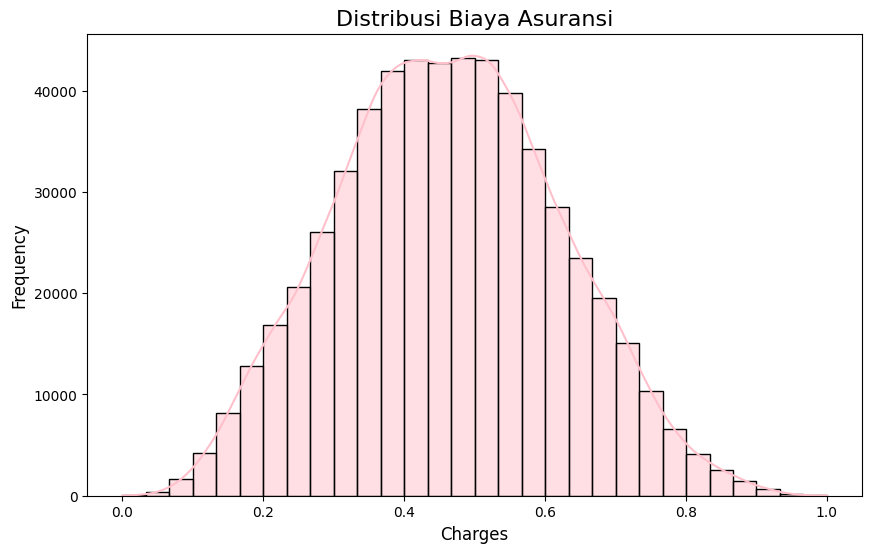

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, color='pink', bins=30)
plt.title("Distribusi Biaya Asuransi", fontsize=16)
plt.xlabel("Charges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

<ipython-input-30-3cc54952d47b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette=['yellow', 'orange'])


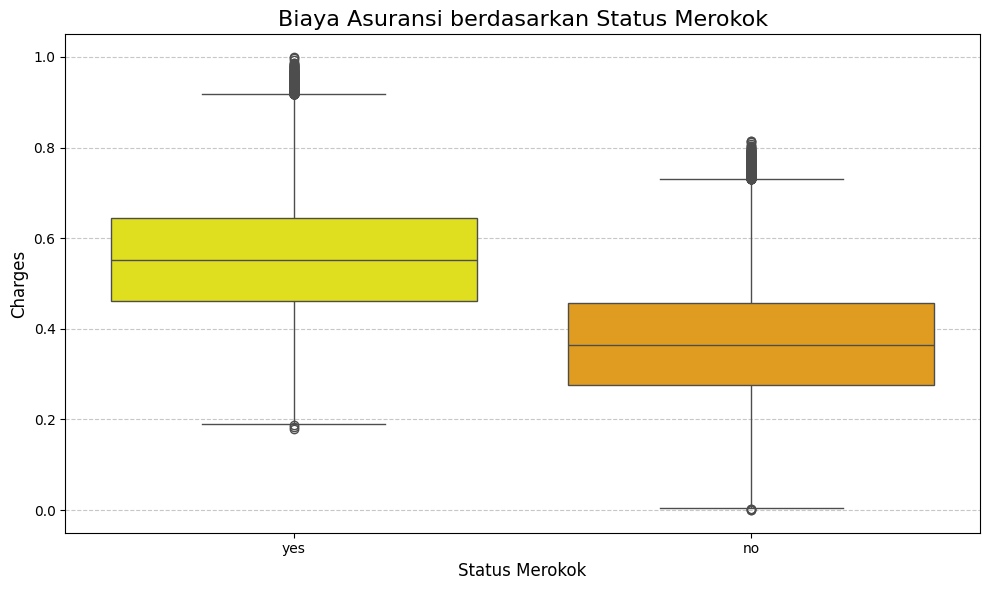

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette=['yellow', 'orange'])
plt.title('Biaya Asuransi berdasarkan Status Merokok', fontsize=16)
plt.xlabel('Status Merokok', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

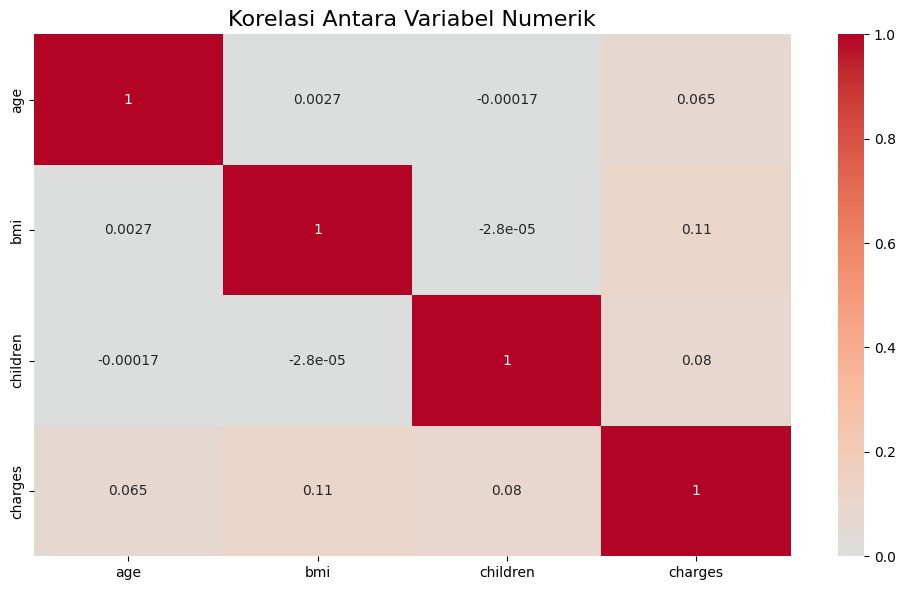

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[['age', 'bmi', 'children', 'charges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi Antara Variabel Numerik', fontsize=16)
plt.tight_layout()
plt.show()

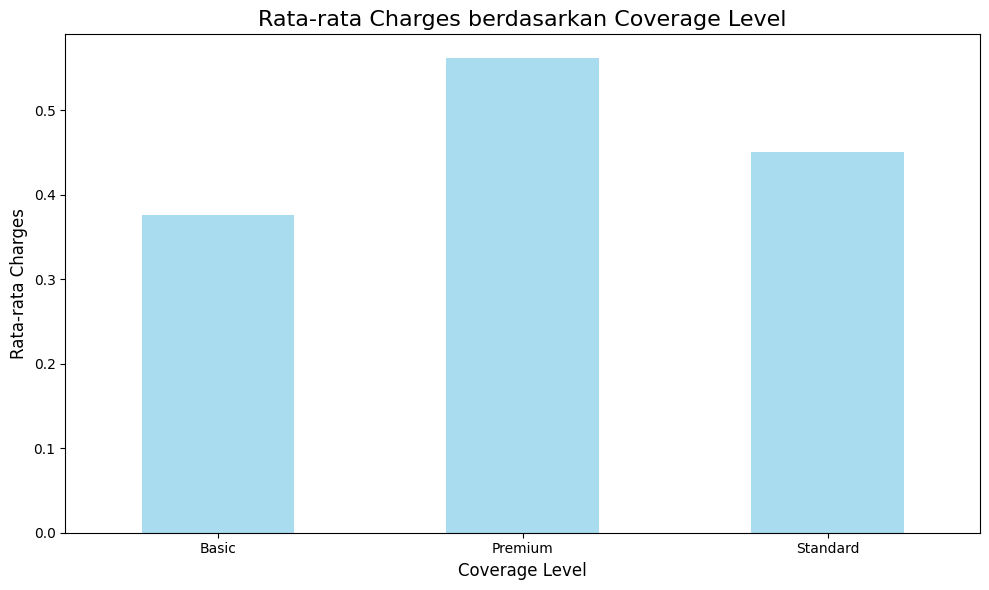

In [ ]:
plt.figure(figsize=(10, 6))
avg_charges_by_coverage = df.groupby('coverage_level')['charges'].mean()
avg_charges_by_coverage.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Rata-rata Charges berdasarkan Coverage Level', fontsize=16)
plt.xlabel('Coverage Level', fontsize=12)
plt.ylabel('Rata-rata Charges', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Implementasi Machine Learning Random Forest

In [ ]:
label_encoders = {}

categorical_columns = ['gender', 'smoker', 'region', 'medical_history', 'family_medical_history', 'exercise_frequency', 'occupation', 'coverage_level']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  
    label_encoders[col] = le 

X = df.drop('charges', axis=1)
y = df['charges']

y = (y > y.median()).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

print("Cross Validation Score (Random Forest):", cv_scores)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nLaporan Klasifikasi (Random Forest):")
print(classification_report(y_test, y_pred))

Cross Validation Score (Random Forest): [0.97250412 0.97340544 0.972782   0.97267072 0.9716915 ]

Laporan Klasifikasi (Random Forest):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     56110
           1       0.97      0.97      0.97     56225

    accuracy                           0.97    112335
   macro avg       0.97      0.97      0.97    112335
weighted avg       0.97      0.97      0.97    112335



# Visualisai Kontribusi Features Pada Machine Learning


Kontribusi Fitur:
                   Feature  Importance
4                   smoker    0.277867
10          coverage_level    0.190319
6          medical_history    0.148729
7   family_medical_history    0.144128
2                      bmi    0.062935
9               occupation    0.043034
0                      age    0.042864
8       exercise_frequency    0.034134
3                 children    0.022719
5                   region    0.017457
1                   gender    0.015814


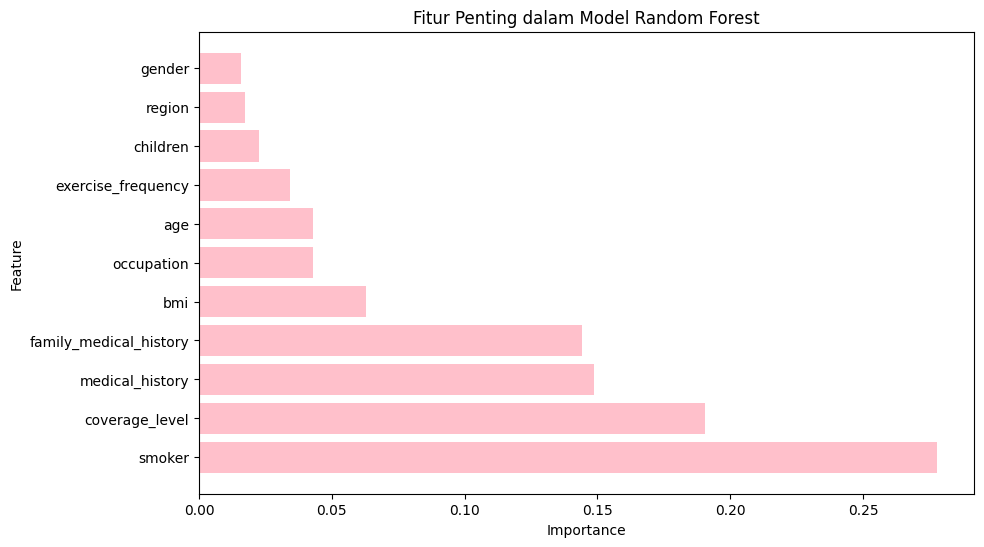

In [ ]:
feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nKontribusi Fitur:")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='pink')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Fitur Penting dalam Model Random Forest')
plt.show()

### Link Dataset:

https://www.kaggle.com/datasets/sridharstreaks/insurance-data-for-machine-learning
